In [1]:
# originally comes from https://www.kaggle.com/c/dogs-vs-cats
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
#                        STOP HERE                                            #
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
# NB run this code only if you want to collect dataset by yourselves!!!!!!!!!!!
# use pickle instead                                                !!!!!!!!!!!
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

SIDE = 32
X = []
y = []
_dir = "D:/dataset/cats-dogs/train/"

for i in range(4000):
    cat = "cat.{}.jpg".format(i)
    dog = "dog.{}.jpg".format(i)
    catimg = cv2.imread(_dir + cat, cv2.IMREAD_COLOR)
    dogimg = cv2.imread(_dir + dog, cv2.IMREAD_COLOR)
    catimg = cv2.resize(catimg, (SIDE, SIDE), interpolation = cv2.INTER_CUBIC)
    dogimg = cv2.resize(dogimg, (SIDE, SIDE), interpolation = cv2.INTER_CUBIC)
    X.extend([catimg.flatten(), dogimg.flatten()])
    y.extend([0, 1])

import pickle

X = np.array(X)
y = np.array(y)

with open('datasets/ml/cats-dogs.pickle', 'wb') as f: pickle.dump((X, y), f)

DOG


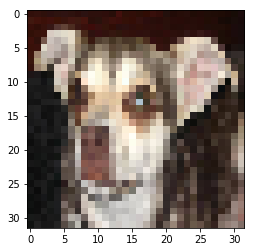

CAT


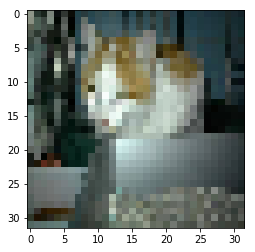

In [3]:
with open('datasets/ml/cats-dogs.pickle', 'rb') as f: 
    X, y = pickle.load(f)

classes = {
    0: "CAT",
    1: "DOG",
}
    
print(classes[y[123]])
plt.imshow(cv2.cvtColor(X[123].reshape((SIDE, SIDE, 3)), cv2.COLOR_BGR2RGB))
plt.show()

print(classes[y[124]])
plt.imshow(cv2.cvtColor(X[124].reshape((SIDE, SIDE, 3)), cv2.COLOR_BGR2RGB))
plt.show()

In [4]:
import time
from sklearn.neural_network import MLPClassifier

In [5]:
# be careful! It runs for ages for MLP classifer
start = time.time()


clf = MLPClassifier(
    solver='lbfgs',    # https://en.wikipedia.org/wiki/Broyden%E2%80%93Fletcher%E2%80%93Goldfarb%E2%80%93Shanno_algorithm
                       # or sgd of adam
    alpha=1e-5,        # regularization term
    activation='relu', # rectifier linear unit
    hidden_layer_sizes=(256, 16),
                       # starts with the size of input, which is SIDE * SIDE * 3 = 24 * 24 * 3
    random_state=7,    # seed for random generator
    verbose=True,
    max_iter=500,      # use this to tune the time relatively
)
clf.fit(X, y)

print("Seconds passed:", time.time() - start)

Seconds passed: 539.5770781040192


In [6]:
# SAVE !!!!! 
with open('datasets/ml/cats-dogs-ann.pickle', 'wb') as f:
    pickle.dump(clf, f)

In [7]:
with open('datasets/ml/cats-dogs-ann.pickle', 'rb') as f:
    clf = pickle.load(f)

y1 = clf.predict(X)

# check for sample
print([
    classes[cls] for cls in clf.predict(X[123:125])
])
print(clf.predict_proba(X[123:125]))
from sklearn.metrics import classification_report, accuracy_score

print("Accuracy:", accuracy_score(y, y1))
print("---------------------")
print(classification_report(y, y1))

['DOG', 'DOG']
[[0.46771995 0.53228005]
 [0.46771995 0.53228005]]
Accuracy: 0.622625
---------------------
             precision    recall  f1-score   support

          0       0.99      0.25      0.40      4000
          1       0.57      1.00      0.73      4000

avg / total       0.78      0.62      0.56      8000



In [8]:
print("Loss: {}, iterations: {}".format(clf.loss_, clf.n_iter_))
for layer in clf.coefs_:
    print(layer.shape)

for bias in clf.intercepts_:
    print(len(bias))

Loss: 0.5564544787562095, iterations: 501
(3072, 256)
(256, 16)
(16, 1)
256
16
1
